# Overview of Dynap-SE2 

This tutorial provides an overview of Dynap-SE2 mixed signal architecture. If you're familiar with the chip and looking for a hands-on tutorial, please see Dynap-SE2 Quick Start tutorial.

Otherwise, let's deep dive into the chip!


## Introduction

Dynap-SE2, (DYnamic Neuromorphic Asynchronous Processor - ScalablE 2) inherits the event-driven nature of the DYNAP family. 
The mixed-signal chip uses analog spiking neurons and analog synapses as the computing units, which directly emulates biological behavior. 
Transistors of the neural cores operate in the subthreshold region, which results in power consumption of about one-thousandth to one-millionth of the state-of-the-art digital neuromorphic chips, below mW. 

Each chip features: 

* **1024 AdExpIF** (adaptive exponential integrate-and-fire) analog ultra-low-power spiking neurons, 
* **64 synapses** per neuron with configurable delay, weight, and short-term plasticity.

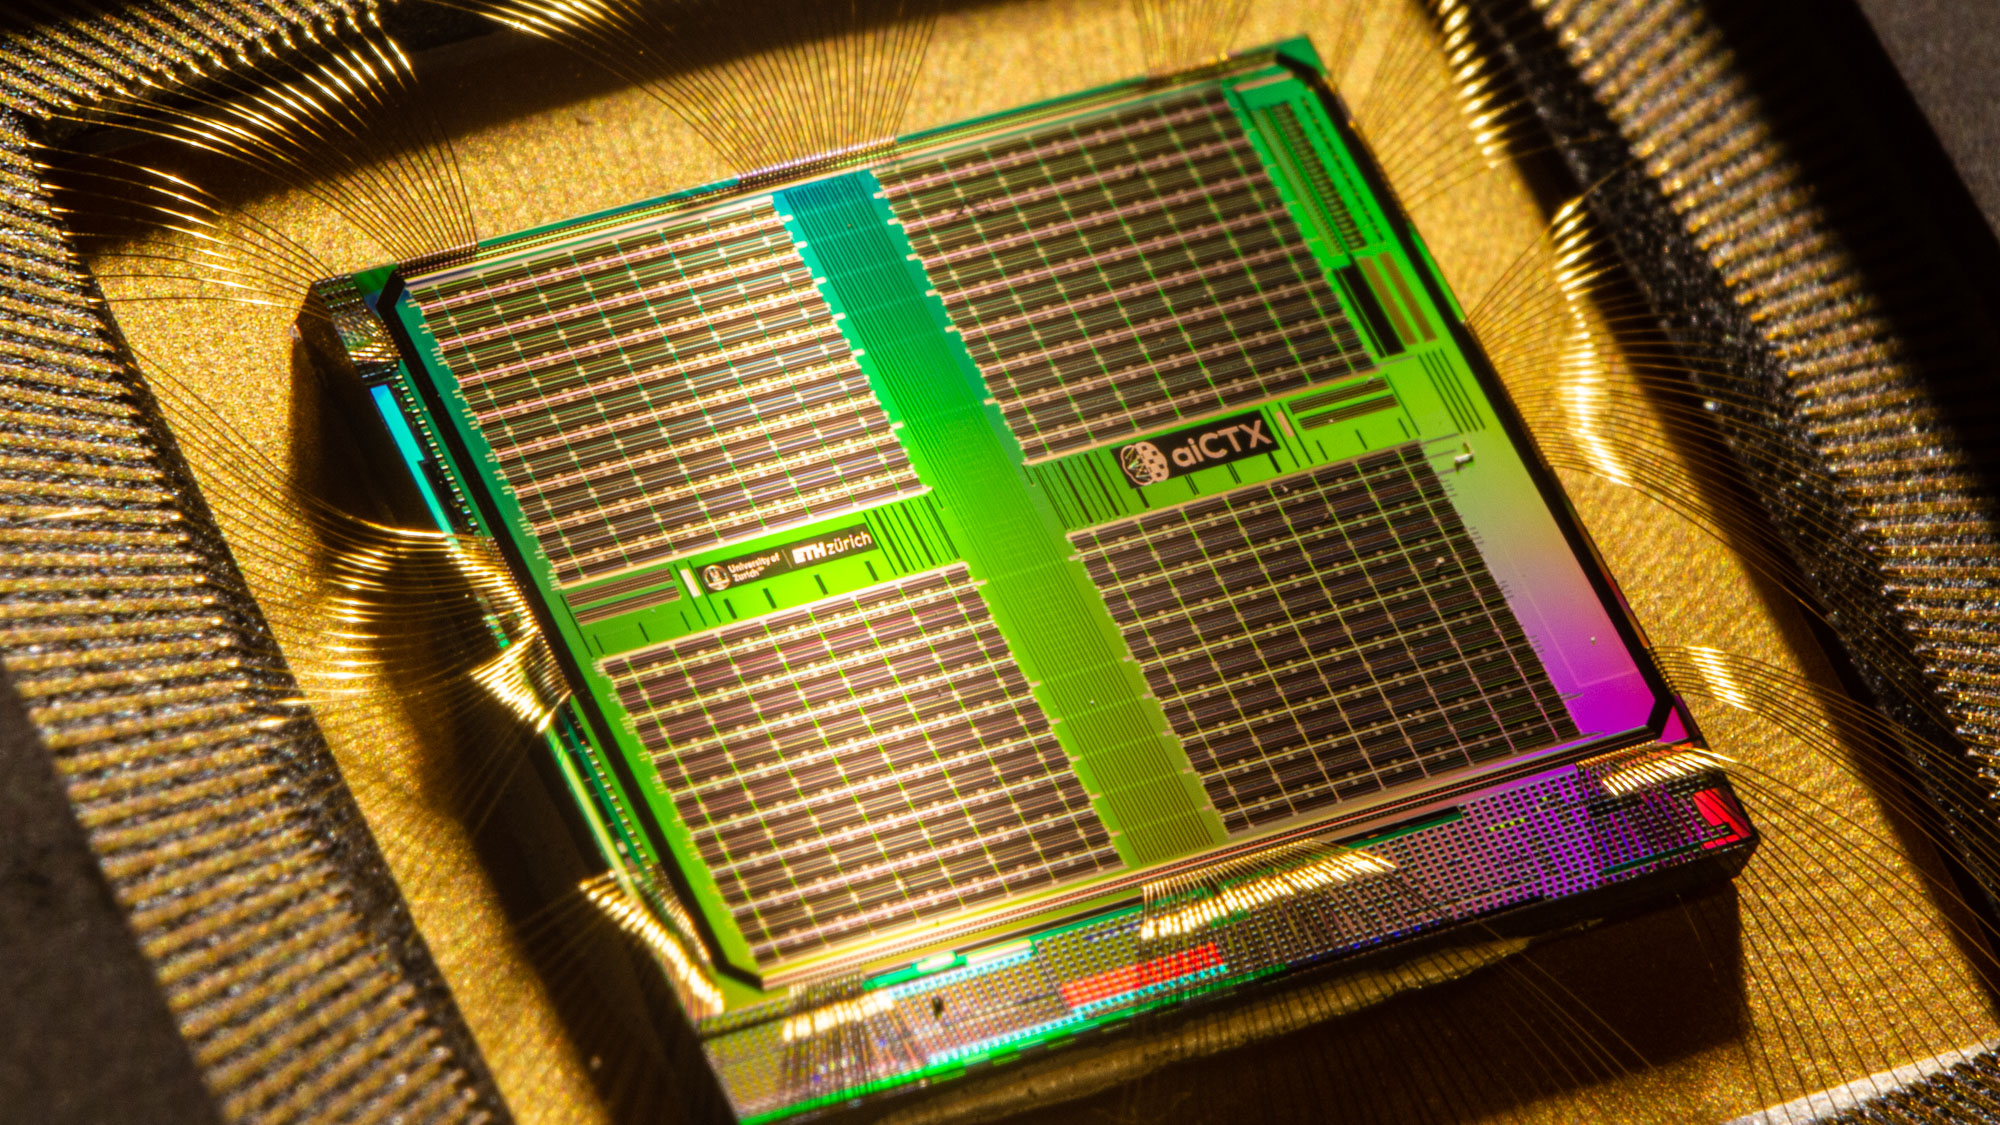

In [9]:
from IPython.display import Image
Image("images/dynapse2.jpeg")


In a broad perspective, Dynap-SE grants a hardware infrastructure to facilitate reconfigurable, general-purpose, real-time analog spiking neural network applications.
The novel event-routing technology of Dynap-SE makes it possible to develop ultra-low-power and ultra-low latency solutions for edge computing applications.
Also, the advanced, configurable neuron and synapse circuitry provides a basis to simulate SNNs with complex dynamical characteristics in analog hardware. 
The figure below displays an abstract architecture of the mixed signal chip.


## Architecture Overview

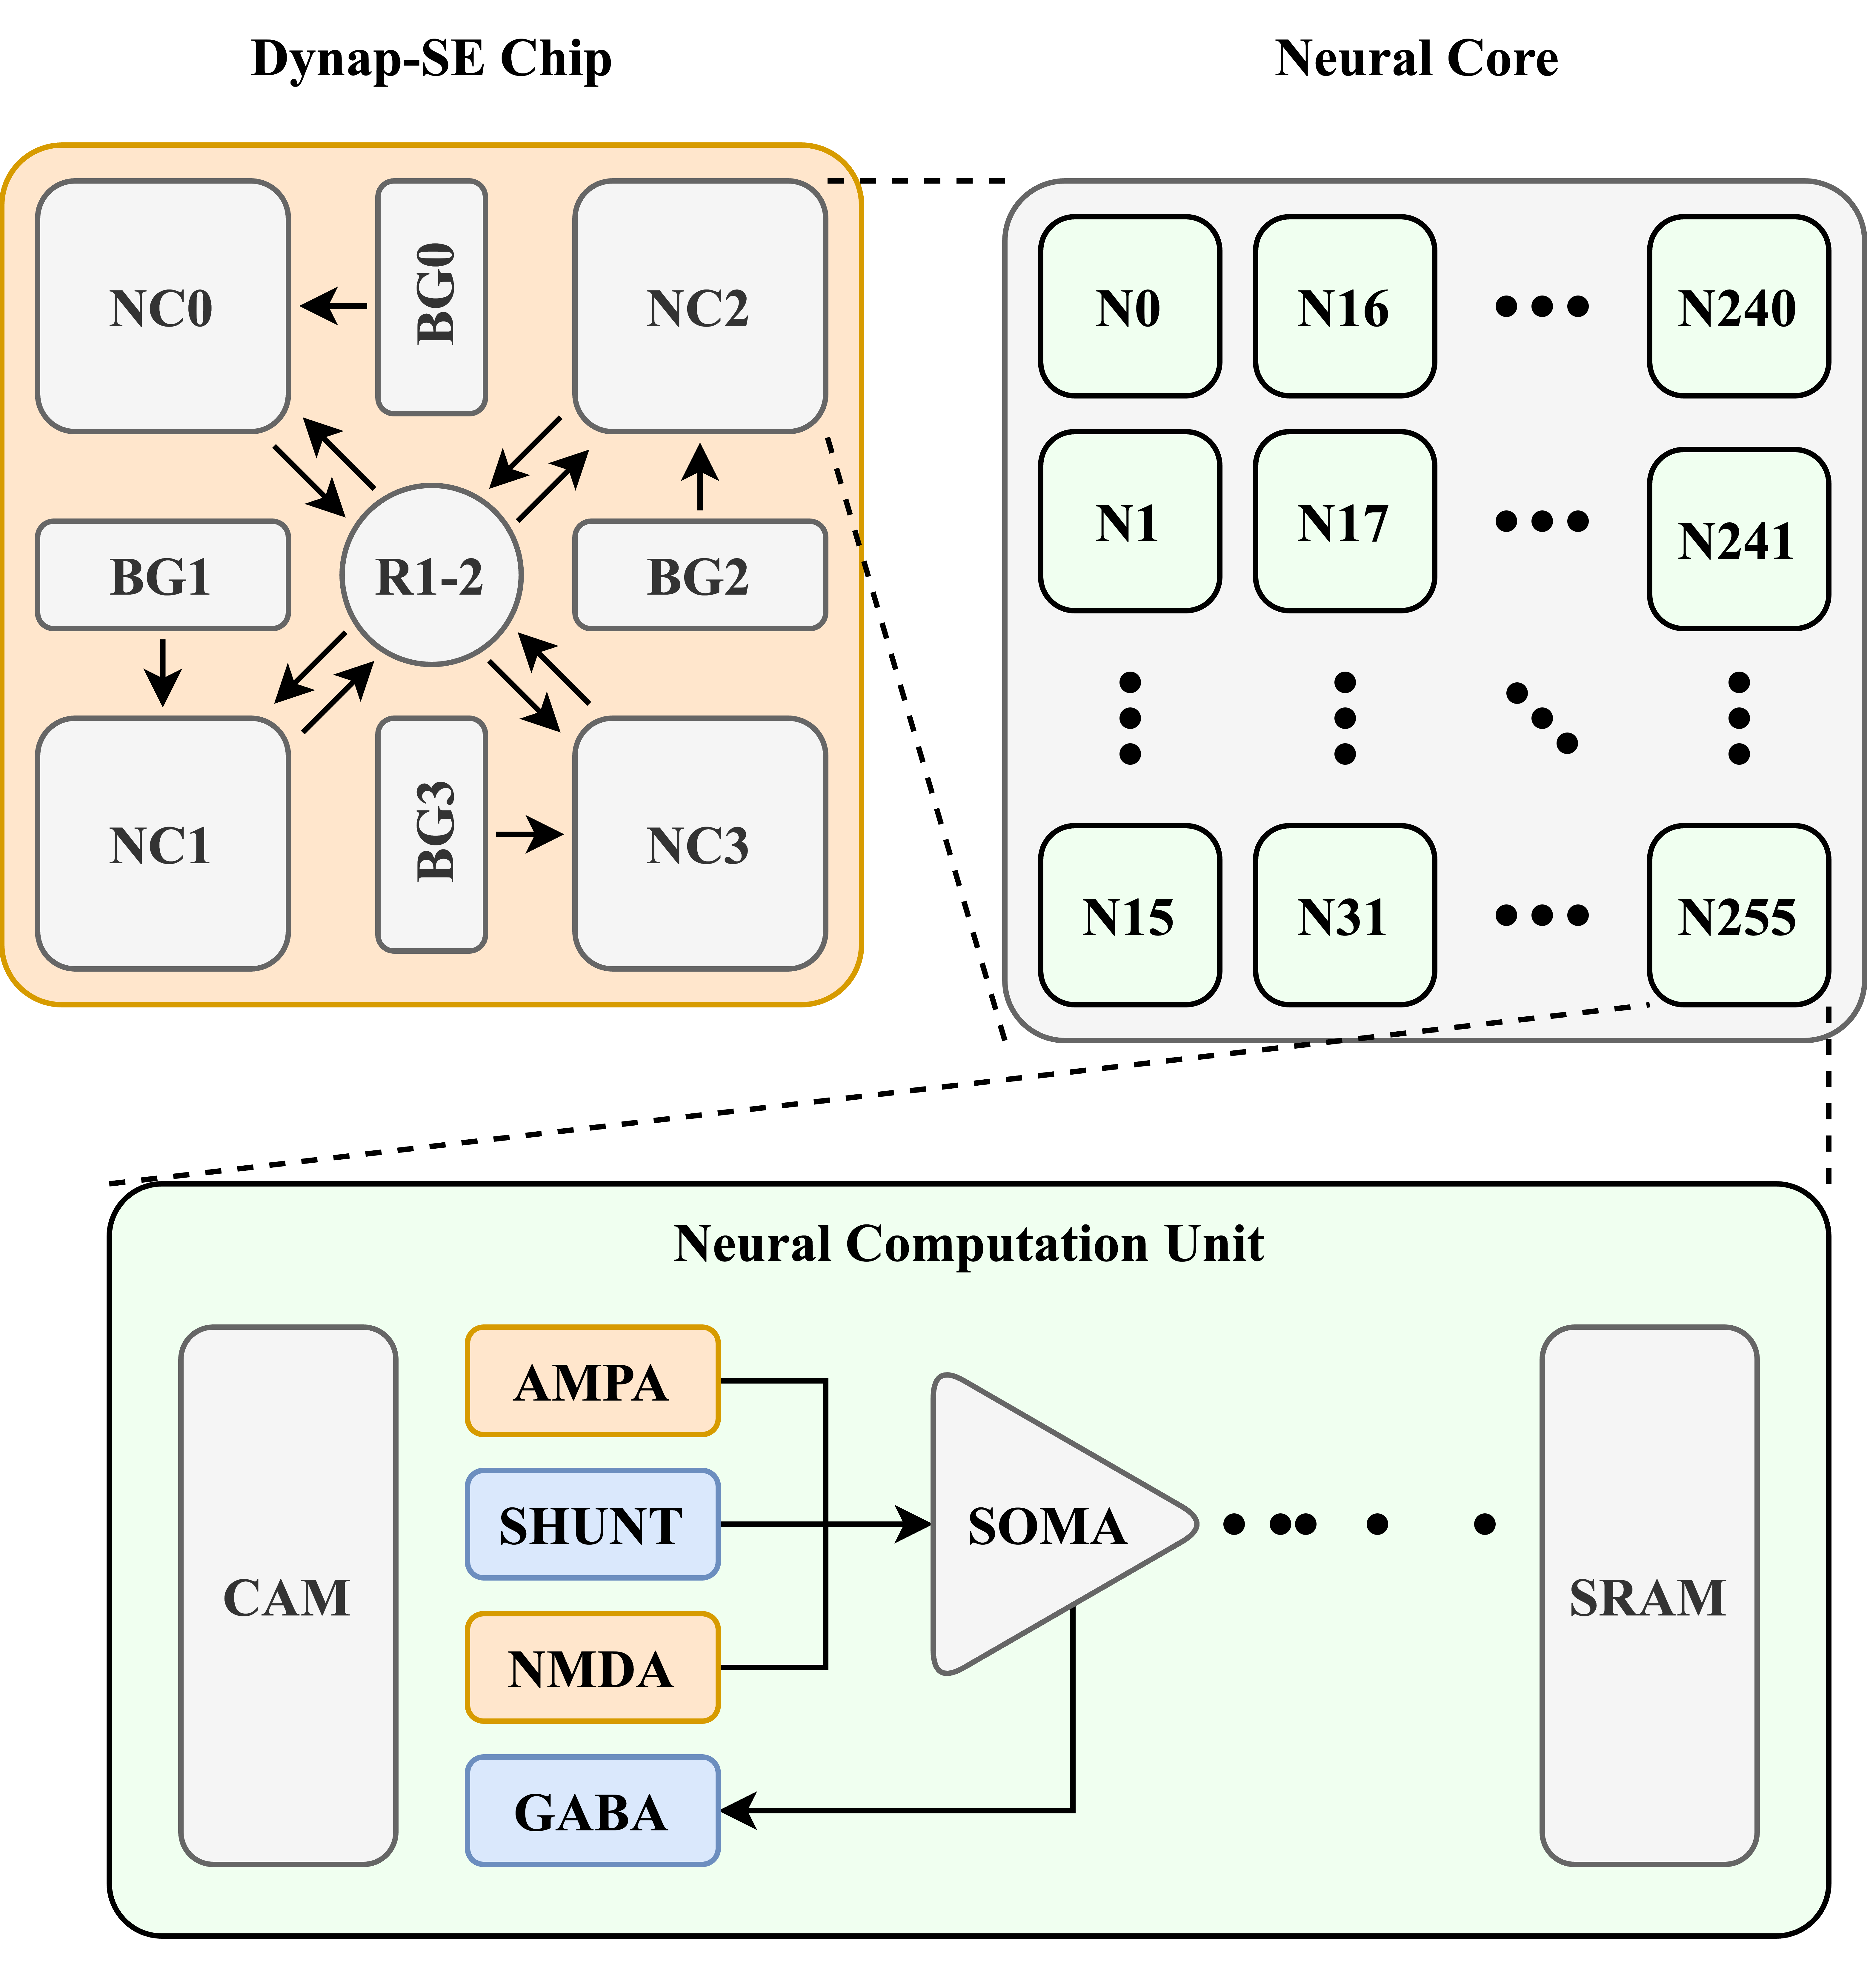

In [10]:
Image("images/dynapse_architecture.png")


The neural computation unit is the main building block creating the dynamics.
Each neural core pieces together 256 analog neurons sharing the same parameter set.
CAM and SRAM are the digital memory blocks holding the transmitting and receiving event configurations.
Analog computation takes place in the synapses and the neuron soma.

Four different synapses: AMPA, GABA, NMDA, and SHUNT, integrate the incoming events and inject current into the membrane.
While AMPA and NMDA produce excitatory post-synaptic potentiation, GABA and SHUNT synapses produce inhibitory post-synaptic potentiation.
In other words, AMPA and NMDA activation increase the chance that the neuron fires; GABA and SHUNT activation decrease the firing probability.
The listening event setting stored in the CAM refers to a synapse type.
Therefore, each of the 64 connections of a neuron can specify its synaptic processing unit.

Neuron soma integrates the injection currents and holds a temporal state.
Charging and discharging capacitors in configurable paths designates the temporal behavior.
A secondary reading on the membrane capacitance, the membrane current, functions as the temporal state variable.
Upon membrane current reaching the firing threshold, the neuron's reset mechanism steps in and triggers the event sensing units.
The event is packaged in AER format and is broadcasted to indicated locations.
In this way, the neuron computes the dynamics using analog sub-threshold circuits but conveys the resulting outputs using a digital routing mechanism.

## Parameter Handling

Each neural core holds a `parameter group` to set the neuronal and synaptic parameters for its 256 neurons and their pre-synaptic synapses. 
The neurons in the same core share the same parameter values, including time constants, refractory periods, synaptic connection strengths and etc. 
Special digital to analog conveters, bias generators denominated as `BG`, set these parameter current values.
In total there are 70 parameters setting different behavioral attributes of the neurons and synapses; including time constants, pulse widths, amplifier gain ratios and synaptic weight strengths.

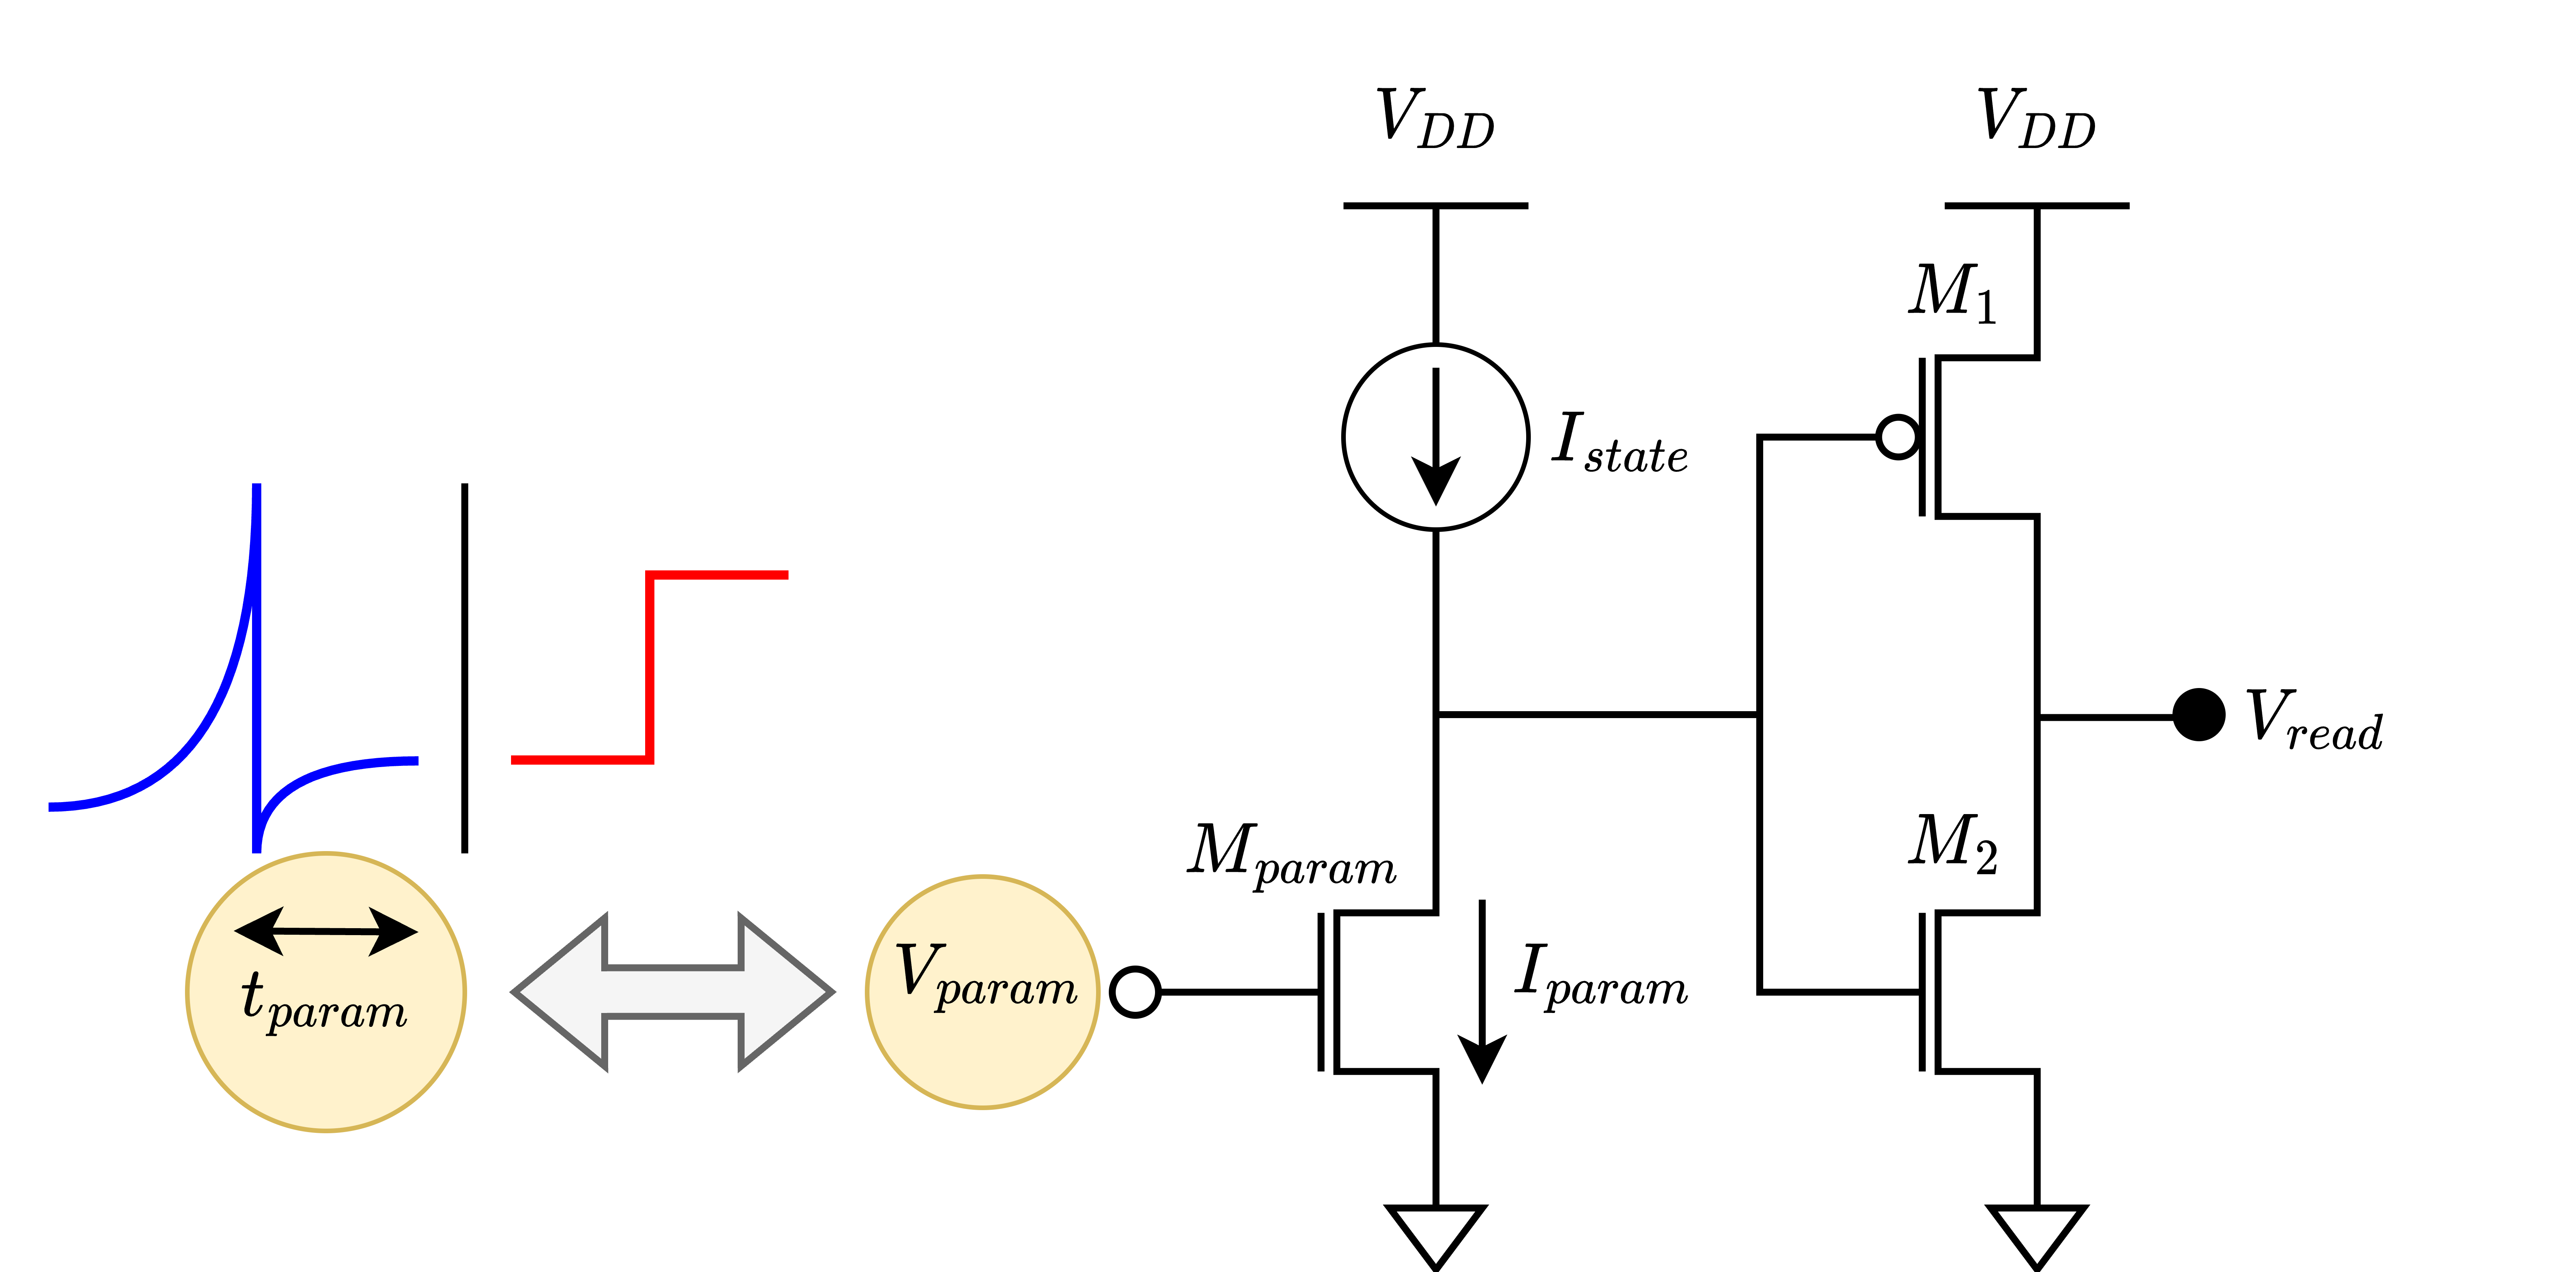

In [11]:
Image("images/param_conversion.png")


For details of the circuits please check:

* Synapse Circuitry
  * C. Bartolozzi and G. Indiveri, "Synaptic Dynamics in Analog VLSI," in Neural Computation, vol. 19, no. 10, pp. 2581-2603, Oct. 2007, doi: 10.1162/neco.2007.19.10.2581.

* Neuron Membrane Circuitry
  * P. Livi and G. Indiveri, "A current-mode conductance-based silicon neuron for address-event neuromorphic systems," 2009 IEEE International Symposium on Circuits and Systems, 2009, pp. 2898-2901, doi: 10.1109/ISCAS.2009.5118408.

* Bias Generator Circuitry
  * T. Delbruck, R. Berner, P. Lichtsteiner and C. Dualibe, "32-bit Configurable bias current generator with sub-off-current capability," Proceedings of 2010 IEEE International Symposium on Circuits and Systems, 2010, pp. 1647-1650, doi: 10.1109/ISCAS.2010.5537475.

## Routing

Each Dynap-SE2 chip has 1024 neurons distributed over 4 individually configurable neural cores, connected by a patented hierarchical routing grid. 
The tag-based routing infrastructure provides direct communication from one chip to 15×15 surrounding chips (7 steps west, 7 steps north, 7 steps east, 7 steps south), connecting up to 230k neurons. 

* Each neuron has 64 fan-in (neuron) and 4 fan-out (neural core) capacity.
* Synapses are not uniquely addressed, instead virtual addresses named tags are used to specify connections.
  * 11-bit globally mutliplexed locally unique/mutliplexed tags

For details please check:

* S. Moradi, N. Qiao, F. Stefanini and G. Indiveri, "A Scalable Multicore Architecture With Heterogeneous Memory Structures for Dynamic Neuromorphic Asynchronous Processors (DYNAPs)," in IEEE Transactions on Biomedical Circuits and Systems, vol. 12, no. 1, pp. 106-122, Feb. 2018, doi: 10.1109/TBCAS.2017.2759700


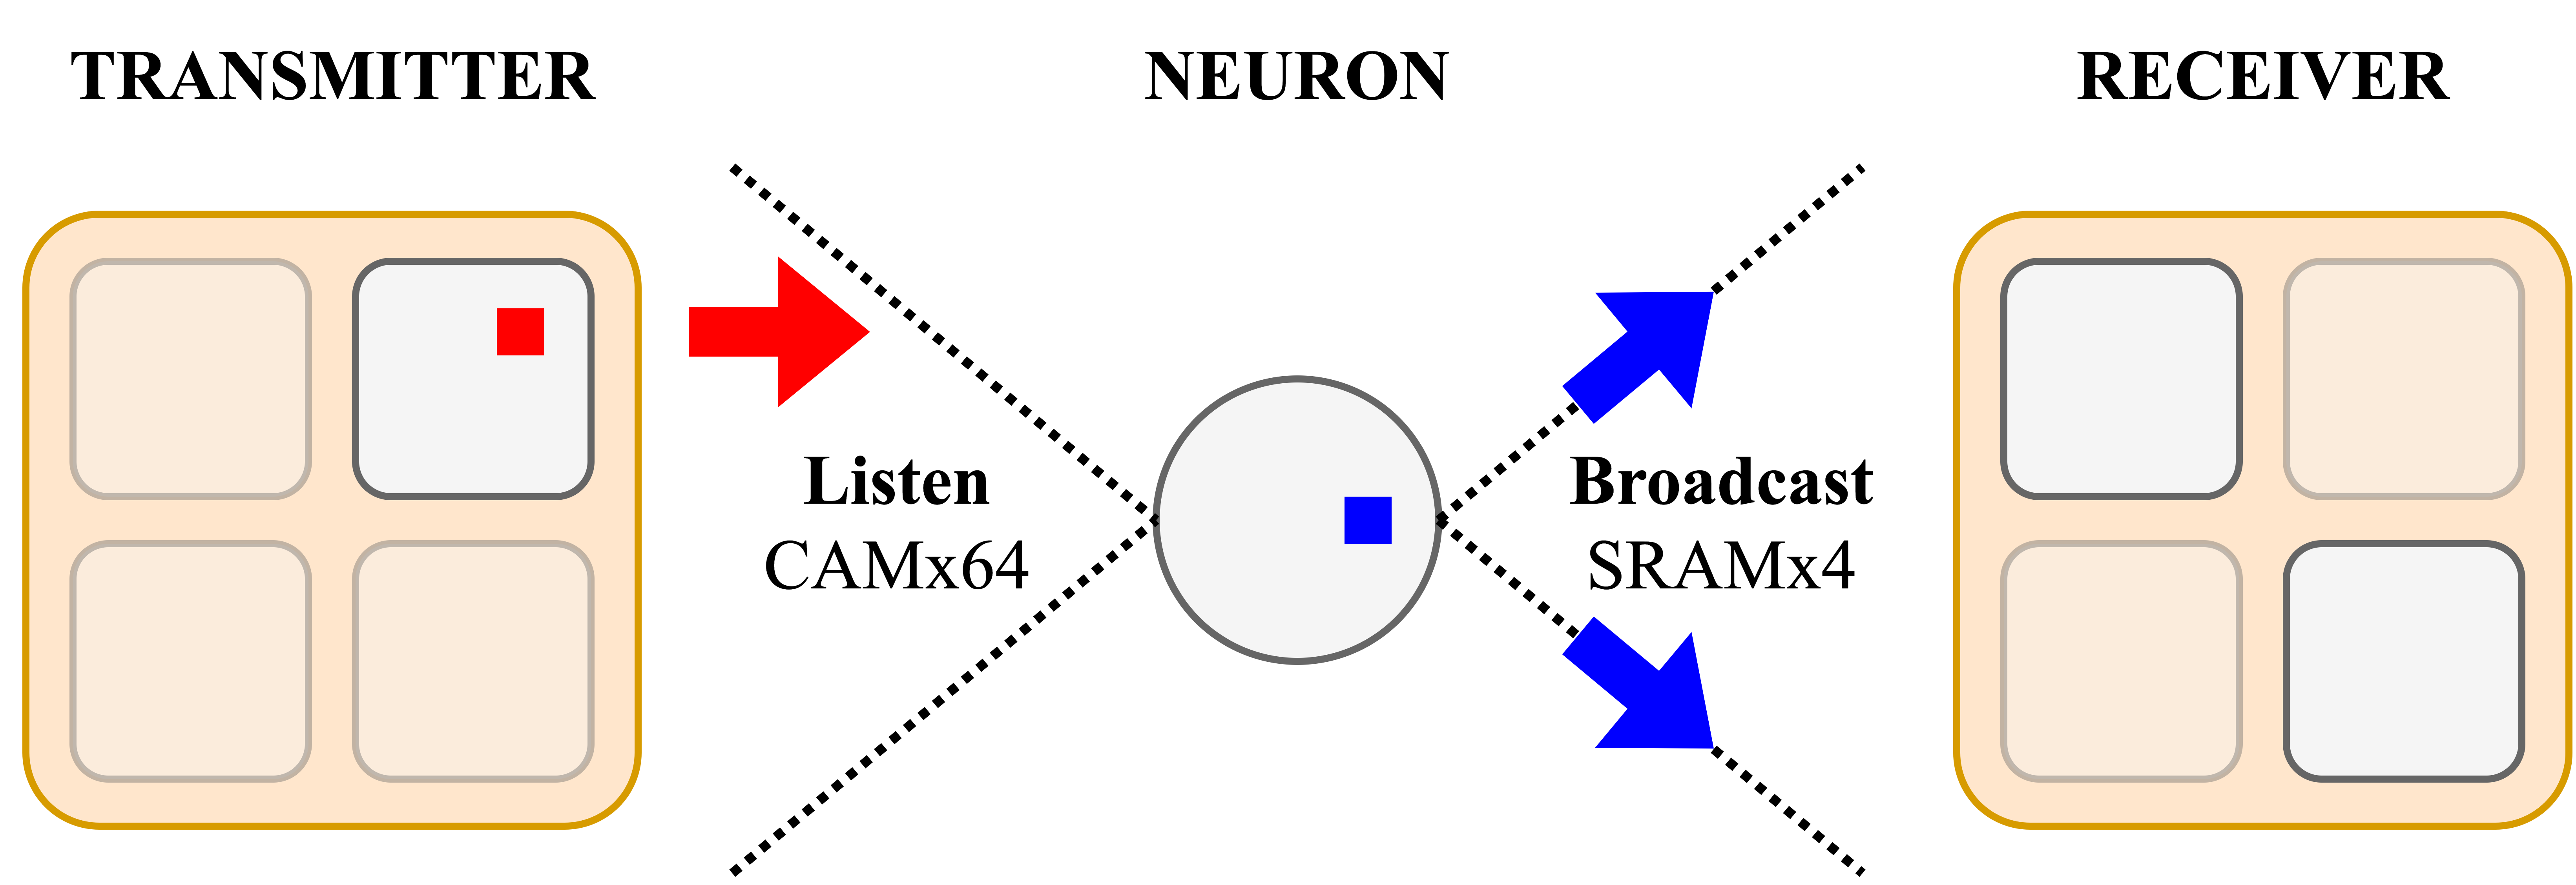

In [12]:
Image("images/router.png")




The neural computation unit is the main building block creating the dynamics.
Each neural core pieces together 256 analog neurons sharing the same parameter set.
CAM and SRAM are the digital memory blocks holding the transmitting and receiving event configurations.
Analog computation takes place in the synapses and the neuron soma.

Four different synapses: AMPA, GABA, NMDA, and SHUNT, integrate the incoming events and inject current into the membrane.
While AMPA and NMDA produce excitatory post-synaptic potentiation, GABA and SHUNT synapses produce inhibitory post-synaptic potentiation.
In other words, AMPA and NMDA activation increase the chance that the neuron fires; GABA and SHUNT activation decrease the firing probability.
The listening event setting stored in the CAM refers to a synapse type.
Therefore, each of the 64 connections of a neuron can specify its synaptic processing unit.

Neuron soma integrates the injection currents and holds a temporal state.
Charging and discharging capacitors in configurable paths designates the temporal behavior.
A secondary reading on the membrane capacitance, the membrane current, functions as the temporal state variable.
Upon membrane current reaching the firing threshold, the neuron's reset mechanism steps in and triggers the event sensing units.
The event is packaged in AER format and is broadcasted to indicated locations.
In this way, the neuron computes the dynamics using analog sub-threshold circuits but conveys the resulting outputs using a digital routing mechanism.

## Simulation

Dynap-SE simulator uses the analytical transfer functions of the analog VLSI neuron&synapse implementations and solves them in time.
It uses Forward-Euler method, which is one of the oldest and simplest algorithms to solve first-order ordinary differential equations given an initial value.
This way, given the current time step state, it predicts the next time step state iteratively.

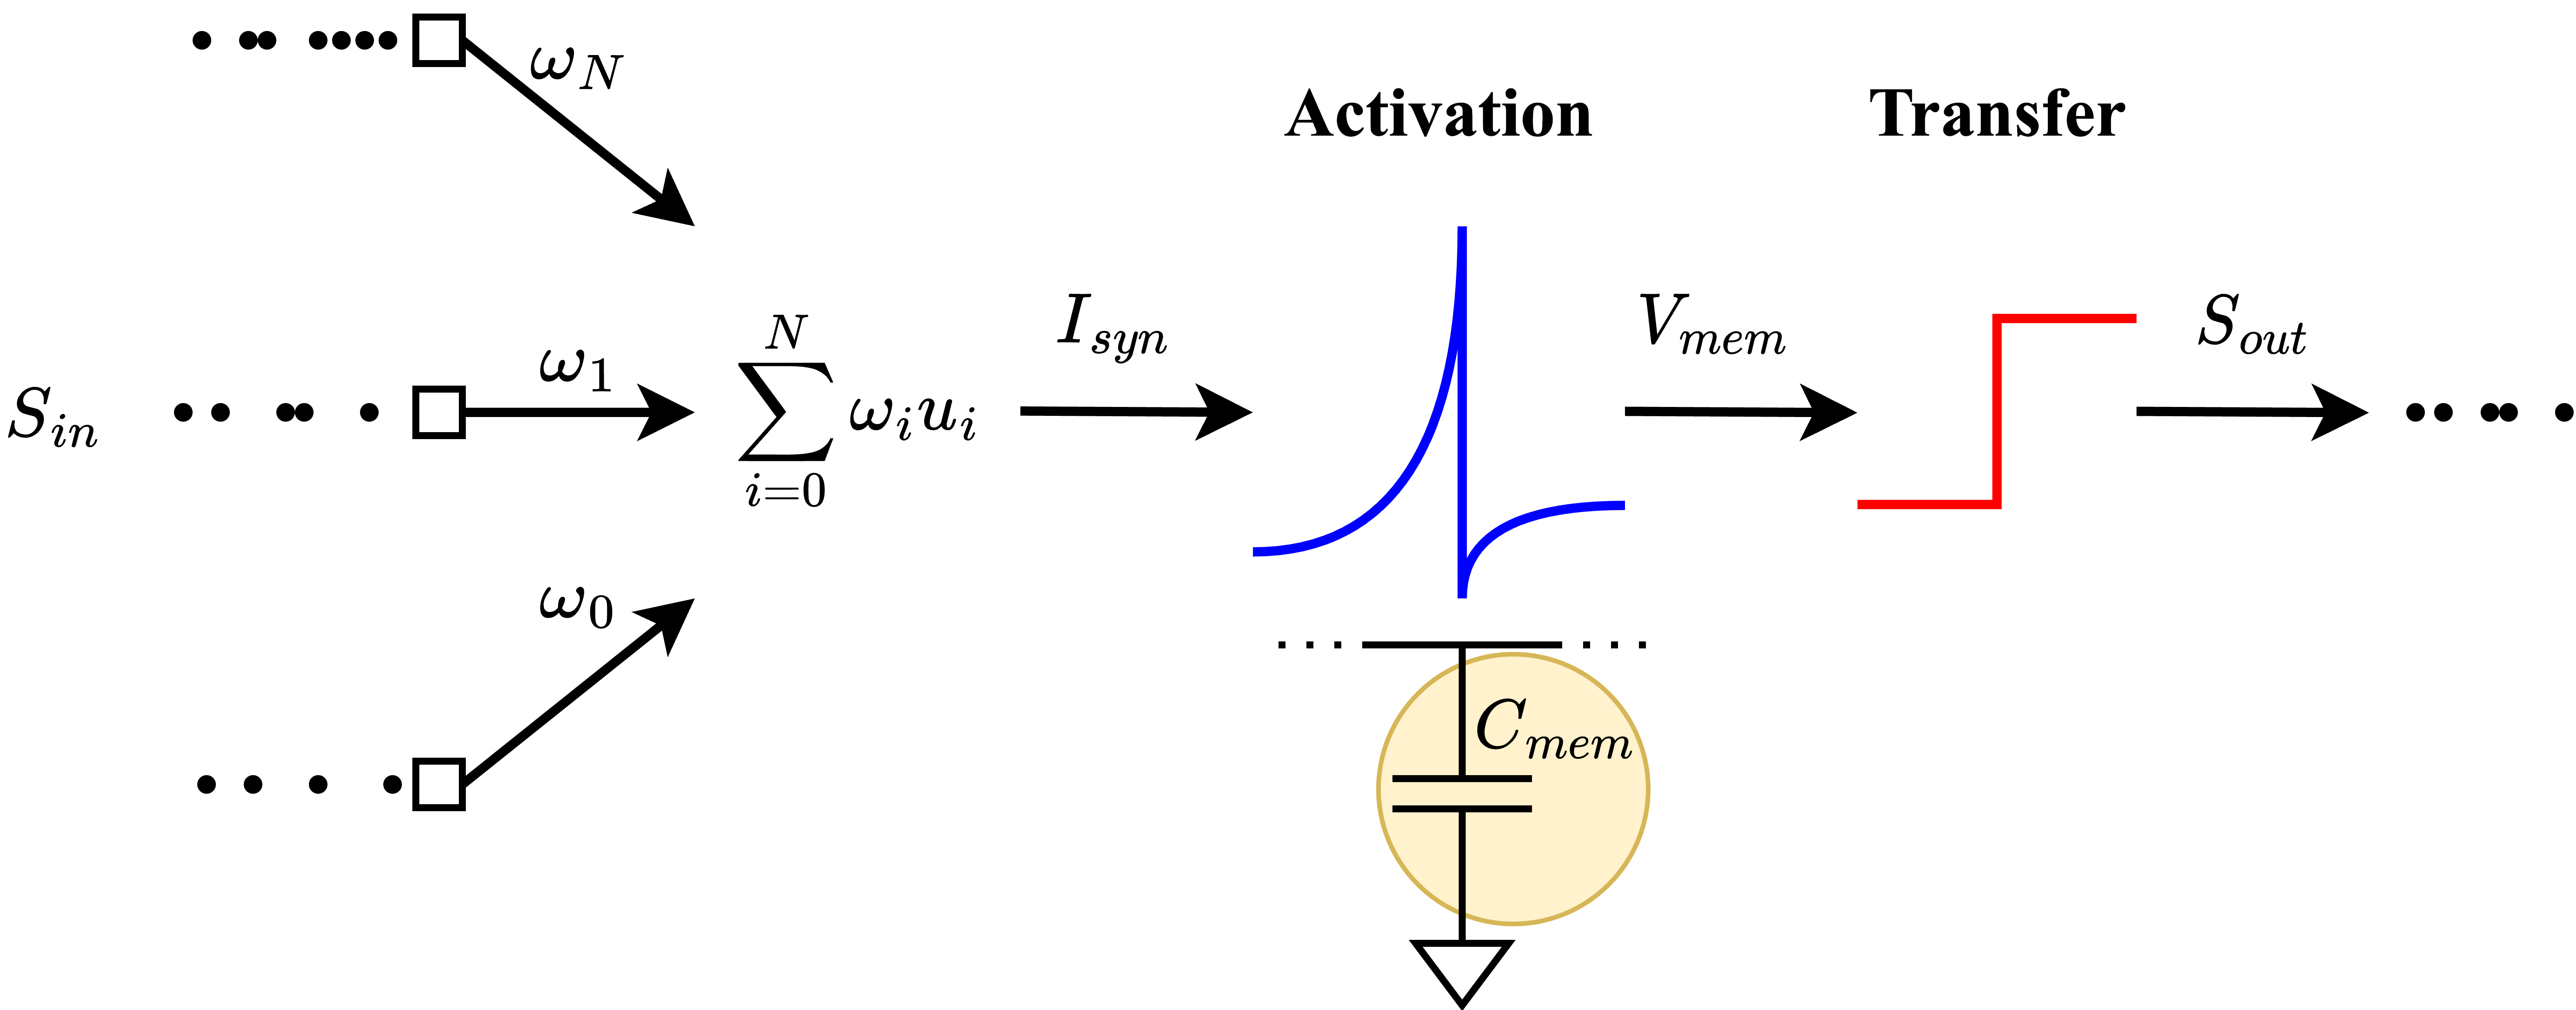

In [13]:
Image("images/spiking_neuron_operation.png")


The simulator `DynapSim`, provides an abstract Dynap-SE machine that operates in the same parameter space as Dynap-SE family processors.
`DynapSim` does not simulate the hardware numerically precisely but executes a fast and an approximate simulation.
It uses forward Euler updates to predict the time-dependent dynamics and solves the characteristic circuit transfer functions in time.
In principle, the device and the simulator do not react exactly the same to the same input.

Due to the nature of the analog device mismatch problem, two physical chips would not react the same as well, it should not create a problem in application development.
The networks to be deployed to a chip should be robust against parameter variations.
To be able to stress this more, `DynapSim` provides an integrated mismatch simulation feature that can alter the parameter projection.

Operating an approximate simulation that has the potential to generalize Dynap-SE processors has advantages over a bulky realistic simulation.
First, it runs a lot faster than a transistor-level accurate simulator.
It makes the optimization pipeline terminate in feasible time windows.
Second, the DynapSim methodology does not rely on exact values; it focuses on reproducing a behavior minimizing the dependence on values.
The values here refer to the exact timing of the spikes, the voltage & current amplitudes, and even the time constants.
This way, abstract machine would have a generalization capacity instead of overfitting to a specific chip layout.
Only a simulator with generalization capability could bring neuromorphic mixed-signal applications to our daily lives.

## Next steps